<a href="https://colab.research.google.com/github/lazregroudayna/recommendationSystem/blob/main/recommendationSystemMovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

# load the datasets
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [18]:
# calculate Average Ratings and Rating Counts
movie_ratings = ratings.groupby('movieId')['rating'].mean()
movie_counts = ratings.groupby('movieId')['rating'].count()


In [19]:
# apply a Minimum Rating Count Threshold
min_ratings = 50  # Only consider movies with at least 50 ratings
popular_movies = pd.DataFrame({
    'movieId': movie_ratings.index,
    'average_rating': movie_ratings.values,
    'rating_count': movie_counts.values
})
popular_movies = popular_movies[popular_movies['rating_count'] >= min_ratings]

In [20]:
# merge with movie titles
popular_movies = popular_movies.merge(movies, on='movieId')

In [21]:
# sort Movies by Weighted Rating
popular_movies = popular_movies.sort_values(
    by=['average_rating', 'rating_count'], ascending=False
)

In [22]:
# recommend Top N Movies
def recommend_top_movies(n=5):
    return popular_movies[['title', 'average_rating', 'rating_count']].head(n)

In [23]:
# recommend Top 5 Movies
top_movies = recommend_top_movies()
print("Top Recommended Movies:")
print(top_movies)


Top Recommended Movies:
                                                 title  average_rating  \
53                    Shawshank Redemption, The (1994)        4.429022   
118                              Godfather, The (1972)        4.289062   
277                                  Fight Club (1999)        4.272936   
171                              Cool Hand Luke (1967)        4.271930   
112  Dr. Strangelove or: How I Learned to Stop Worr...        4.268041   

     rating_count  
53            317  
118           192  
277           218  
171            57  
112            97  


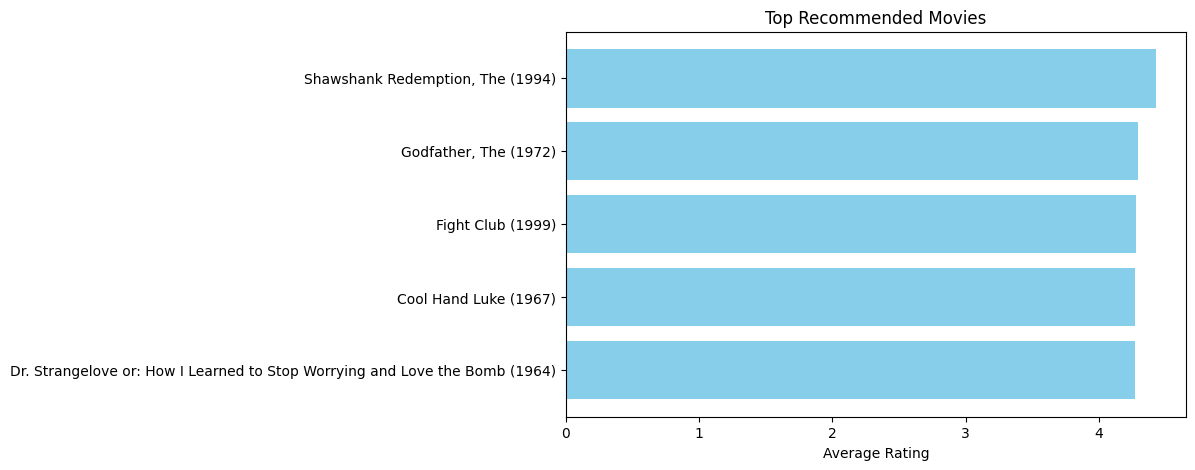

In [24]:
# Simple Visualization of the Top Recommended Movies
import matplotlib.pyplot as plt
def visualize_top_movies(top_movies):
    plt.figure(figsize=(8, 5))
    plt.barh(top_movies['title'], top_movies['average_rating'], color='skyblue')
    plt.xlabel("Average Rating")
    plt.title("Top Recommended Movies")
    plt.gca().invert_yaxis()  # Invert y-axis to display the highest rated movies at the top
    plt.show()

# Call the visualization function for the top movies
visualize_top_movies(top_movies)

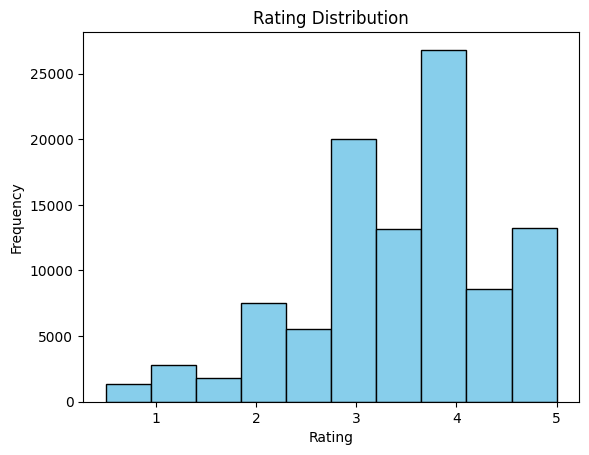

In [12]:
# Distribution of ratings for all movies
plt.hist(ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()
